# Machine Learning Assignment 

<br> Umar Sultan, Student No. 33615754, I worked and submitted alone. <br> 

This task is based on an energy efficiency prediction problem which is a regression problem. Perform an analysis using different building shapes, with different characteristics, and predict the heating load of the building. The buildings differ with respect to the glazing area, the glazing area distribution, the orientation, and other aspects comprised in the dataset.

The dataset (below) for this task includes 9 features, denoted by X0, X1, ..., X8, and an outcome variable Y which needs to be predicted. The dataset contains missing values. Here is the meaning of the 10 variables:

## Legend 

X0:  Category of the building <br>
X1: Relative Compactness <br>
X2: Surface Area <br>
X3: Wall Area <br>
X4: Roof Area <br>
X5: Overall Height <br>
X6: Orientation <br>
X7: Glazing Area <br>
X8: Glazing Area Distribution <br>
Y: Heating Load <br>


# Tasks
Perform data inspection and visualisation, data preprocessing including data splitting in 70% training data, and 30% test data, data transformations you consider useful, treatment of missing values, feature selection if you consider it useful, etc. <br>
Models that can be used, neural networks: simple Linear Regression, Ridge Regression, Lasso Regression, Elastic Net Regression, Polynomial Regression with regularisation, and Neural Network. Only use the best 2 models on the test set.

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed, as well as Scikit-Learn ≥0.20.

In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports.
import numpy as np
import os

# To plot our figures.
# %matplitlib inline, keeps our executed plots saved in the notebook.
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures.
ASSIGNMENT_ROOT_DIR = "."
CHAPTER_ID = "ml_assignment"
IMAGES_PATH = os.path.join(ASSIGNMENT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Load and Read the Data 

In [2]:
# You can read the dataset simply using pandas function read_csv as follows:
# data = pd.read_csv("datcw_na.csv").

In [3]:
import pandas as pd

def load_energy_data():
    return pd.read_csv("datcw_na.csv")

## Taking a look structure of the data 

In [4]:
# The outcome variable (to predict) is y (heating load);
# Note that the heating load is in units of KW or BTU, I'm not sure which it here though.
energy = load_energy_data()
energy.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,C3,1.19,622.55,NaN,89.31,7.00,1.98,0.0,0.0,15.55
1,C1,1.19,622.55,323.40,109.15,7.70,3.00,0.0,0.0,15.55
2,C1,0.88,463.05,291.06,99.23,5.67,4.40,0.0,0.0,15.55
3,C2,0.79,509.36,291.06,121.28,6.30,4.05,0.0,0.0,15.55
4,C1,0.89,507.15,385.39,121.28,7.70,2.00,0.0,0.0,20.84


In [5]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      768 non-null    object 
 1   X1      768 non-null    float64
 2   X2      768 non-null    float64
 3   X3      728 non-null    float64
 4   X4      768 non-null    float64
 5   X5      768 non-null    float64
 6   X6      768 non-null    float64
 7   X7      768 non-null    float64
 8   X8      768 non-null    float64
 9   Y       768 non-null    float64
dtypes: float64(9), object(1)
memory usage: 60.1+ KB


In [6]:
# I'm changing them to their real names becasue its really confusing to work with non descriptive values.
energy.rename({'X0': 'building_category', 'X1': 'relative_compactness', 'X2': 'surface_area', 'X3': 'wall_area', 
              'X4': 'roof_area', 'X5': 'overall_height', 'X6': 'orientation', 'X7': 'glazing_area', 
              'X8': 'glazing_area_dist', 'Y': 'heating_load'}, axis=1, inplace=True)

In [7]:
energy.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   building_category     768 non-null    object 
 1   relative_compactness  768 non-null    float64
 2   surface_area          768 non-null    float64
 3   wall_area             728 non-null    float64
 4   roof_area             768 non-null    float64
 5   overall_height        768 non-null    float64
 6   orientation           768 non-null    float64
 7   glazing_area          768 non-null    float64
 8   glazing_area_dist     768 non-null    float64
 9   heating_load          768 non-null    float64
dtypes: float64(9), object(1)
memory usage: 60.1+ KB


In [8]:
# Notice that building category is the only categorical variable, with the following counts on its values.
# Basically non numerical values.
energy["building_category"].value_counts()

C2    265
C3    260
C1    243
Name: building_category, dtype: int64

In [9]:
# Here's useful description of the data counts and distributions of variables.
energy.describe()

# You can see that Building category has 40 less elements that all other columns which have a fixed 768 elements,
# meaning it is porbably missing vlaues.

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_dist,heating_load
count,768.000000,768.000000,728.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.763516,666.768997,321.102527,176.564141,5.229766,3.527331,0.237852,2.803737,22.307201
std,0.147093,120.863329,60.479340,51.280618,1.844813,1.245710,0.139736,1.597817,10.090196
min,0.500000,416.740000,198.450000,89.310000,2.840000,1.620000,0.000000,0.000000,6.010000
25%,0.650000,575.510000,277.830000,132.300000,3.470000,2.427500,0.100000,1.517500,12.992500
50%,0.750000,661.500000,315.320000,178.235000,4.955000,3.600000,0.240000,2.970000,18.950000
75%,0.860000,741.130000,355.740000,218.300000,6.930000,4.425000,0.360000,3.960000,31.667500
max,1.190000,978.290000,503.970000,266.800000,8.470000,6.050000,0.480000,6.050000,43.100000


Saving figure attribute_histogram_plots


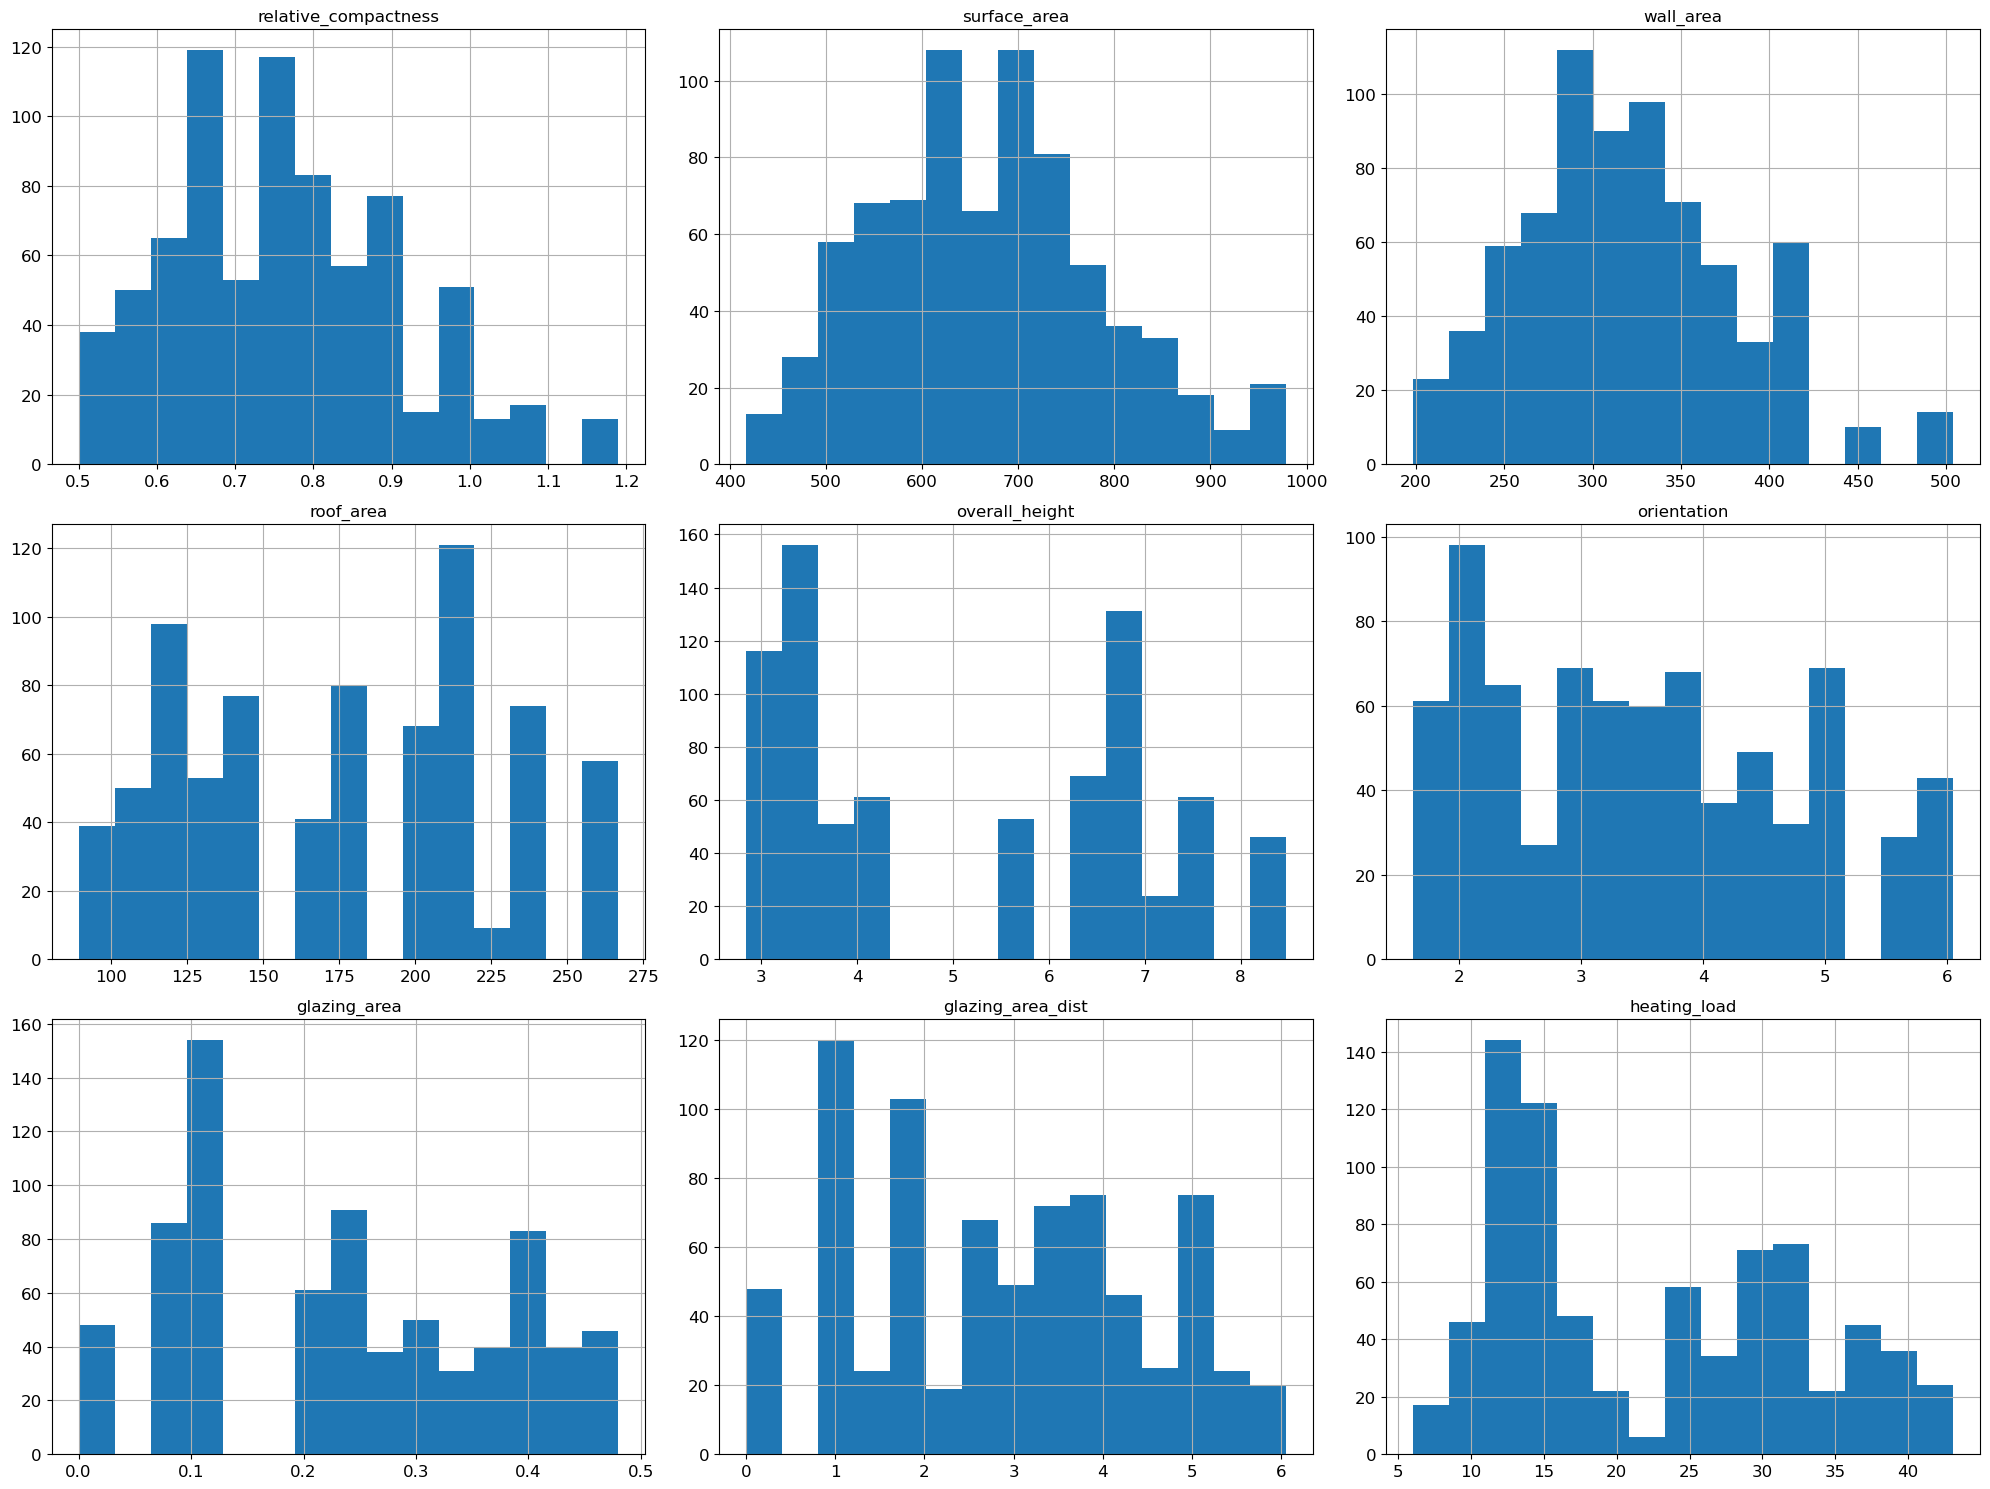

In [10]:
# Let's visually inspect the data with histograms showing bars of frequencies of numeric values grouped in bins.

%matplotlib inline
import matplotlib.pyplot as plt
energy.hist(bins=15, figsize=(20,15))
# Binning is just determining the divide of the entire range of values into a series of intervals—and then counting
# how many values fall into each interval. Think of it like the num of bars being produced for each historgram.
save_fig("attribute_histogram_plots")
plt.show()

Above, the histograms are giving us a viusal representation of the frequency of data points for set ranges of values for every category in our data. The y axis representing the frequency and the x axis representing the value ranges.

## Creating a Test Set

In [11]:
# To make this notebook's output identical at every run.
np.random.seed(42) # regularising rand basically.

In [12]:
# Spliting data into train and test sets, for model training and evaluation.

from sklearn.model_selection import train_test_split

# Random state controls the shuffling of data before splitting it.
# 70:30 split for the training and testing data as specified.
train_set, test_set = train_test_split(energy, test_size=0.3, random_state=42)

You may have noticed us using the number 42 for random state in the split as well. This will continue throughout the notebook for whenever we have to do any random methods or generate any random numbers. Adding this degree of predictability to our data helps us lower the loss for regressoin models.

In [13]:
test_set.head()

,building_category,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_dist,heating_load
668,C2,0.68,800.42,444.68,242.55,3.47,1.98,0.32,3.63,16.47
324,C2,0.59,683.55,350.35,242.55,3.47,2.42,0.25,0.90,13.17
624,C2,0.97,509.36,291.06,121.28,5.67,1.62,0.32,2.70,32.82
690,C2,0.64,700.70,339.57,161.70,6.93,3.96,0.40,3.60,41.32
473,C1,0.77,776.16,NaN,266.80,3.47,2.97,0.25,4.40,16.69


<AxesSubplot: >

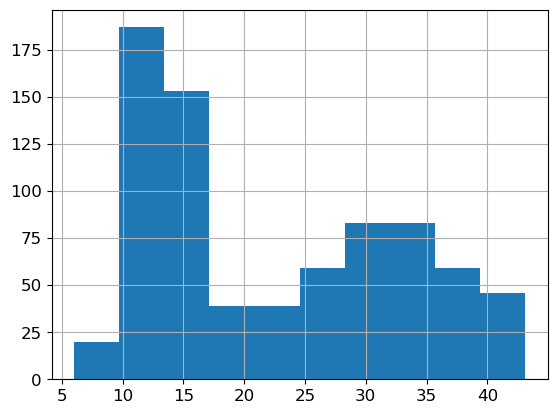

In [14]:
energy["heating_load"].hist()

The majority of our buildings heating loads lie between 9 and 17 

In [15]:
corr_matrix = energy.corr(method='pearson', numeric_only='default')

corr_matrix["heating_load"].sort_values(ascending=False)

heating_load            1.000000
overall_height          0.815769
relative_compactness    0.454177
wall_area               0.312449
glazing_area            0.255901
glazing_area_dist       0.087106
orientation             0.001340
surface_area           -0.481192
roof_area              -0.771040
Name: heating_load, dtype: float64

By making the correlations in respect to heating load, we can see what attributes are most closely realted to heating load without having to understand the math which attribute would have the most bearing on our heating load. We can see here that it's overall height.

In [16]:
# We build height categories (3) because we know that this variable is closely linked with the (target)heating load,
# and use these categories to sample (once again) our data into training and test sets, proportipnally with these 
# categories. 
# So, we do this in a stratified manner called stratified sampling

energy["height_cat"] = pd.cut(energy["overall_height"],
                               bins=[0., 3.0, 6., np.inf],
                               labels=[1, 2, 3])

In [17]:
energy["height_cat"].value_counts()

2    385
3    331
1     52
Name: height_cat, dtype: int64

<AxesSubplot: >

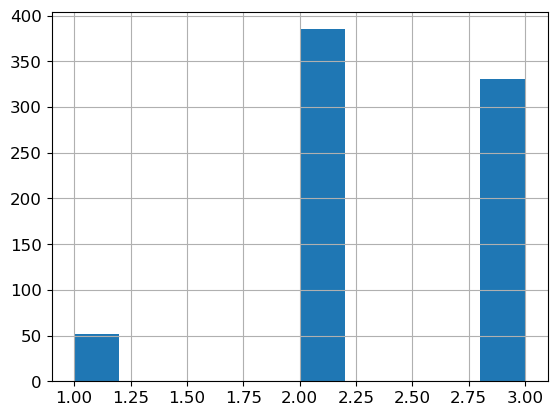

In [18]:
energy["height_cat"].hist()

In [19]:
# Now we do stratified sampling on height_cat.

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(energy, energy["height_cat"]):
    strat_train_set = energy.loc[train_index]
    strat_test_set = energy.loc[test_index]

In [20]:
strat_test_set["height_cat"].value_counts()

2    116
3     99
1     16
Name: height_cat, dtype: int64

In [21]:
strat_test_set["height_cat"].value_counts() / len(strat_test_set)

2    0.502165
3    0.428571
1    0.069264
Name: height_cat, dtype: float64

In [22]:
energy["height_cat"].value_counts() / len(energy)

2    0.501302
3    0.430990
1    0.067708
Name: height_cat, dtype: float64

In [23]:
def height_cat_proportions(data):
    return data["height_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(energy, test_size=0.3, random_state=42)

compare_props = pd.DataFrame({
    "Overall": height_cat_proportions(energy),
    "Stratified": height_cat_proportions(strat_test_set),
    "Random": height_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
# Compare sample proportions across groups.

In [24]:
# Now we compare proportions of height_cat in the total dataset, and train and test sets obtained with
# stratified and random sampling.
# Observe that the stratified sampling leads to proportions similar to the total/overall dataset in each row whereas,
# random is slightly different and that stand errors are lower.

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.067708,0.069264,0.051948,-23.276723,2.297702
2,0.501302,0.502165,0.480519,-4.145724,0.172036
3,0.430990,0.428571,0.467532,8.478832,-0.561070


In [25]:
# After stratified sampling using height_cat, we drop this variable from the train and test datasets.

for set_ in (strat_train_set, strat_test_set):
    set_.drop("height_cat", axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights

In [26]:
# Makeing a copy of the training dataset.
energy = strat_train_set.copy()

## Visualizing more data

Saving figure bad_visualization_plot


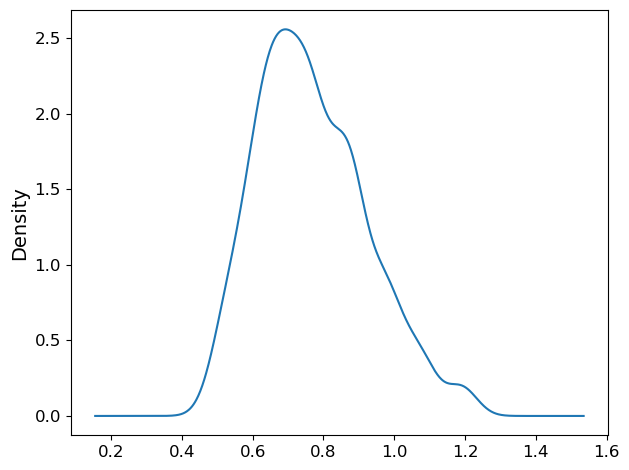

In [27]:
energy["relative_compactness"].plot(kind="kde")
save_fig("bad_visualization_plot")

<AxesSubplot: ylabel='Density'>

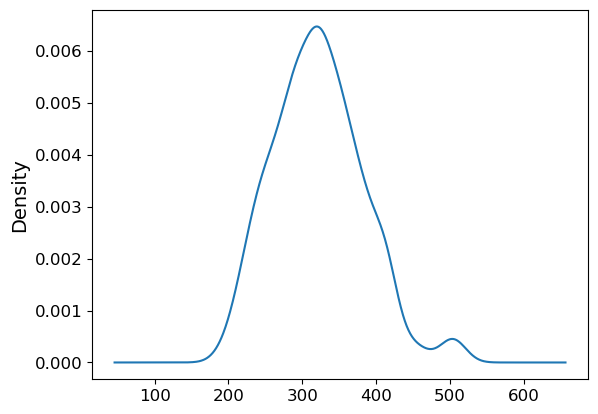

In [28]:
energy["wall_area"].plot(kind="kde")

<AxesSubplot: ylabel='Density'>

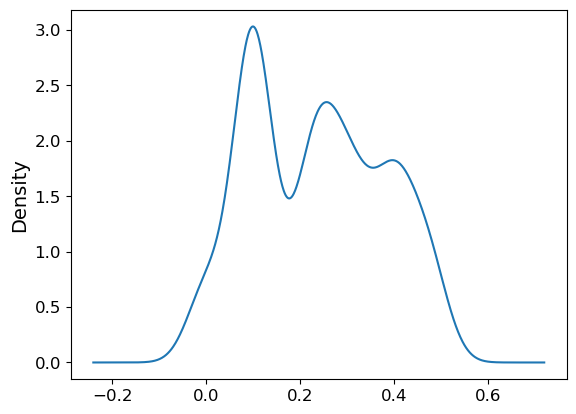

In [29]:
energy["glazing_area"].plot(kind="kde")

<AxesSubplot: ylabel='Density'>

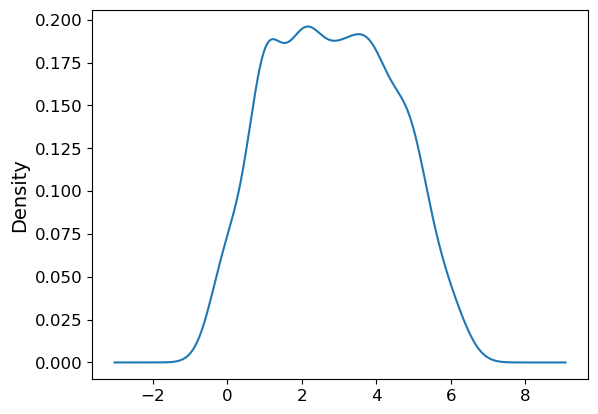

In [30]:
energy["glazing_area_dist"].plot(kind="kde")

<AxesSubplot: ylabel='Density'>

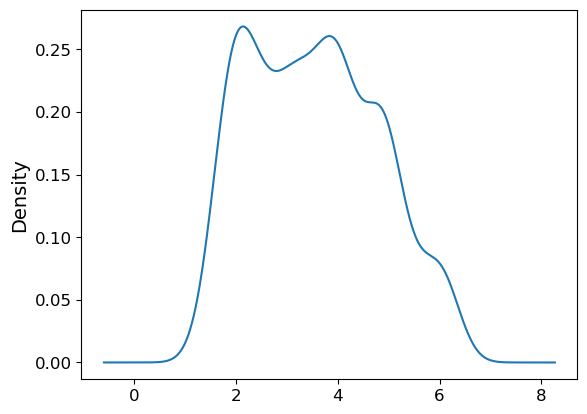

In [31]:
energy["orientation"].plot(kind="kde")

<AxesSubplot: ylabel='Density'>

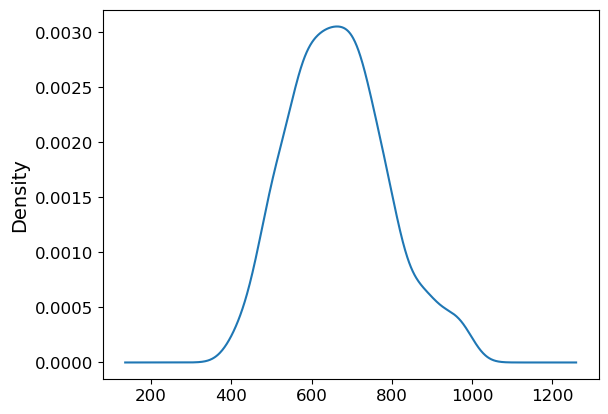

In [32]:
energy["surface_area"].plot(kind="kde")

<AxesSubplot: ylabel='Density'>

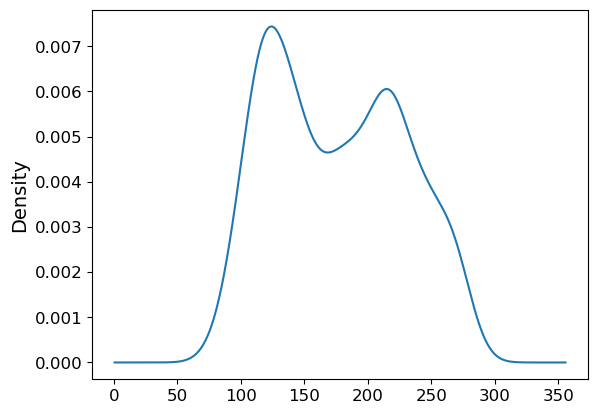

In [33]:
energy["roof_area"].plot(kind="kde")

## Looking for more Correlations

In [34]:
corr_matrix = energy.corr(numeric_only='default')

In [35]:
# We see that overall height is mostly positively correlated with heating load. 

corr_matrix["heating_load"].sort_values(ascending=False)

heating_load            1.000000
overall_height          0.814933
relative_compactness    0.430605
wall_area               0.328044
glazing_area            0.249650
glazing_area_dist       0.112027
orientation            -0.023921
surface_area           -0.494041
roof_area              -0.773621
Name: heating_load, dtype: float64

Saving figure scatter_matrix_plot


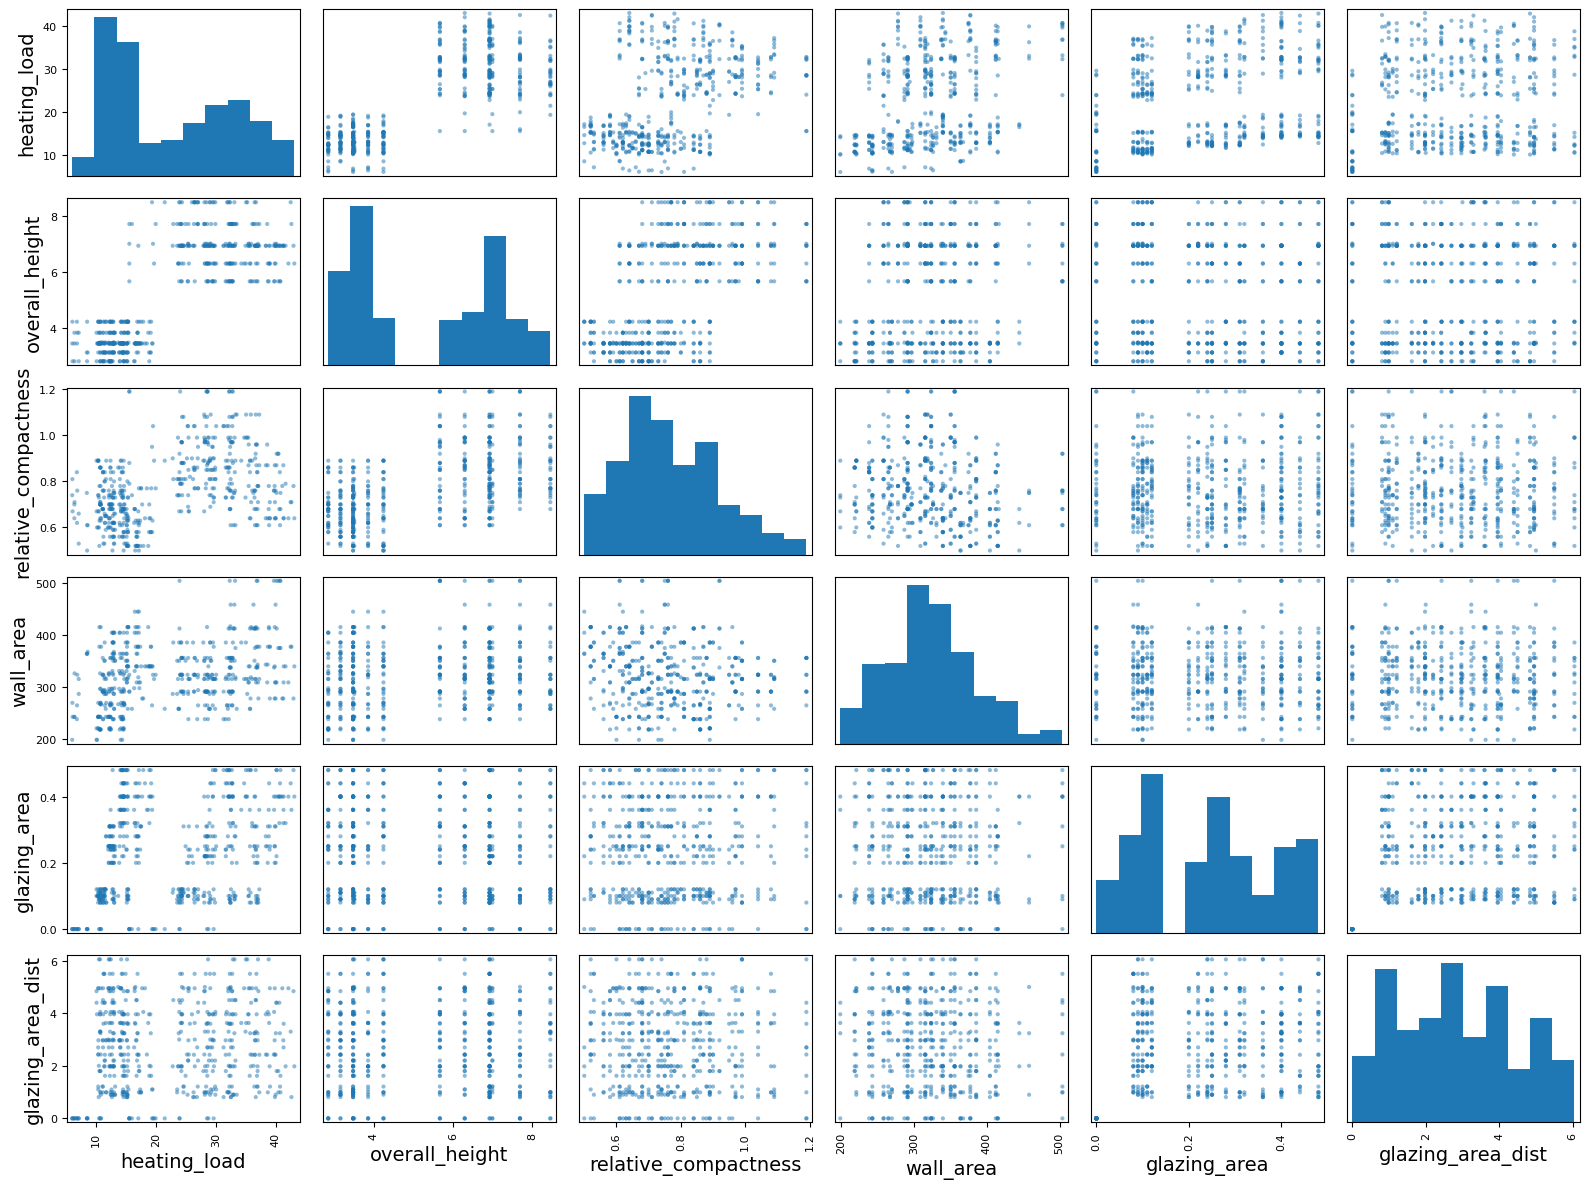

In [36]:
# A deeper look into our 6 positively correlated attributes.

from pandas.plotting import scatter_matrix

attributes = ["heating_load", "overall_height", "relative_compactness",
              "wall_area", "glazing_area", "glazing_area_dist"]
scatter_matrix(energy[attributes], figsize=(16, 12))
save_fig("scatter_matrix_plot")

Looking at the scatter plots above, you can see in various plots that data points just cluster next to eachother on the highest point of their graphs respective Y axis. This demonstrates the cap or ceiling of the data collection that exists in the data itself. Let's enlarge one of the graphs from the scatetr matrix to get a better look.

Saving figure data_ceiling_demo


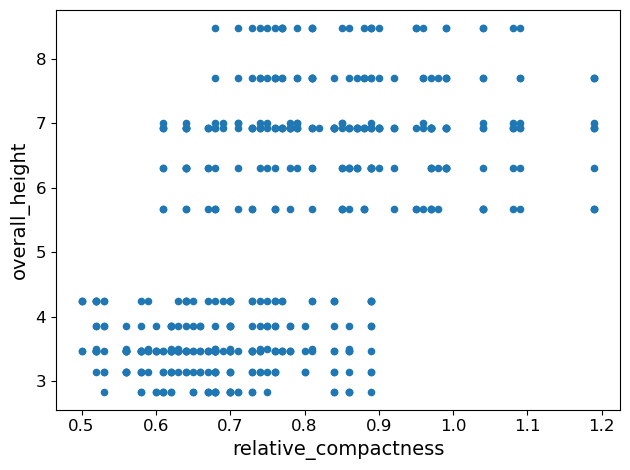

In [37]:
energy.plot(kind="scatter", x="relative_compactness", y="overall_height")
save_fig("data_ceiling_demo")

Saving figure height_vs_heating_load_scatterplot


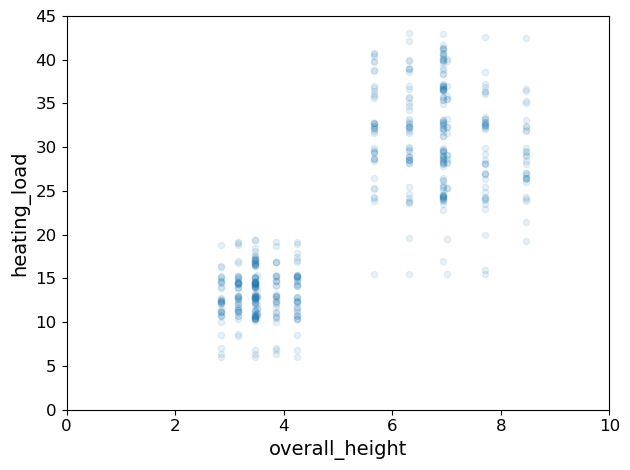

In [38]:
energy.plot(kind="scatter", x="overall_height", y="heating_load",
             alpha=0.1)
plt.axis([0, 10, 0, 45])
save_fig("height_vs_heating_load_scatterplot")

## Experimenting with Attribute/ Variable Combinations
We're going to try to create new variables by combining our existing data to see if we can find a combination of data that proves to be benefical in adding to the accuracy of our models prediction. As of right now, I can only think of one possible combination that provides a meaningful variable. We could also in the same spirits drop variables that prove to be detremental to our model instead.

In [39]:
# Add new variables in hopes of it adding more depth to your existing data.
energy["total_area"] = energy["wall_area"]*energy["surface_area"]*energy["roof_area"]
# you could also call it building volume

# I think the missing values in wall_area may be messing this up

In [40]:
# Checking again, are any of the added variables showing good or better correlation with the target variable.

corr_matrix = energy.corr(numeric_only='default')
corr_matrix["heating_load"].sort_values(ascending=False)

heating_load            1.000000
overall_height          0.814933
relative_compactness    0.430605
wall_area               0.328044
glazing_area            0.249650
glazing_area_dist       0.112027
orientation            -0.023921
surface_area           -0.494041
total_area             -0.552865
roof_area              -0.773621
Name: heating_load, dtype: float64

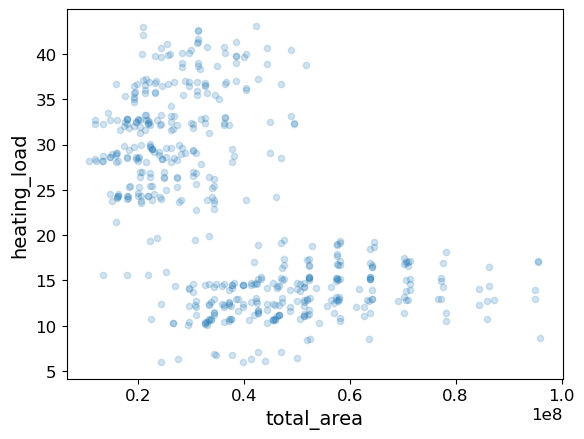

Saving figure new_var_and_target_corr


<Figure size 640x480 with 0 Axes>

In [41]:
# A more visual representation of new variable with the target varaible.
energy.plot(kind="scatter", x="total_area", y="heating_load", alpha=0.2)
plt.show()
save_fig("new_var_and_target_corr")

In [42]:
# Looking at the graph above we can see that the heating load does not infact increase with the increase of area of
# of the buildings.
energy.describe()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_dist,heating_load,total_area
count,537.000000,537.000000,511.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,5.110000e+02
mean,0.768399,665.653277,321.937397,175.936015,5.235568,3.537561,0.235475,2.807095,22.385345,3.842626e+07
std,0.153381,121.759046,60.809040,52.040054,1.833894,1.251535,0.141146,1.607620,10.078121,1.761619e+07
min,0.500000,416.740000,198.450000,89.310000,2.840000,1.620000,0.000000,0.000000,6.010000,1.083231e+07
25%,0.650000,575.510000,277.830000,122.500000,3.470000,2.420000,0.100000,1.620000,13.000000,2.417301e+07
50%,0.750000,654.890000,318.500000,177.870000,5.670000,3.600000,0.240000,2.700000,19.200000,3.438696e+07
75%,0.870000,741.130000,355.740000,218.300000,6.930000,4.500000,0.360000,3.960000,31.890000,4.941542e+07
max,1.190000,978.290000,503.970000,266.800000,8.470000,6.050000,0.480000,6.050000,43.100000,9.592036e+07


We can see that total_area has a negitive correlation with heating_load so it isn't worth using going forward for our model.

In [43]:
energy = energy.drop("total_area", axis=1)
energy.describe()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_dist,heating_load
count,537.000000,537.000000,511.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,0.768399,665.653277,321.937397,175.936015,5.235568,3.537561,0.235475,2.807095,22.385345
std,0.153381,121.759046,60.809040,52.040054,1.833894,1.251535,0.141146,1.607620,10.078121
min,0.500000,416.740000,198.450000,89.310000,2.840000,1.620000,0.000000,0.000000,6.010000
25%,0.650000,575.510000,277.830000,122.500000,3.470000,2.420000,0.100000,1.620000,13.000000
50%,0.750000,654.890000,318.500000,177.870000,5.670000,3.600000,0.240000,2.700000,19.200000
75%,0.870000,741.130000,355.740000,218.300000,6.930000,4.500000,0.360000,3.960000,31.890000
max,1.190000,978.290000,503.970000,266.800000,8.470000,6.050000,0.480000,6.050000,43.100000


Looking at the data counts above we can see that wall_area has a lower count than all the other categories which have an identical number of counts.

# Preparing the Data for our Machine Learning Algorithms

In [44]:
energy = strat_train_set.drop("heating_load", axis=1) # Drop labels for training set
energy_labels = strat_train_set["heating_load"].copy()
# Copying it after dropping it and not before is still weird.

## Data Cleaning

There are 3 options we can use for missing values treatment:

```python
housing.dropna(subset=["wall_area"])    # Option 1 drop the rows with missing values.
housing.drop("wall_area", axis=1)       # Option 2 drop the column with missing values. 
median = housing["wall_area"].median()  # Option 3 compute median and impute (fill in with median) the missing values. 
housing["wall_area"].fillna(median, inplace=True)
```

We'll demonstrate the third option here, because thats the one wer're going to use for our data. To demonstrate this,  let's create a copy of the housing dataset, but keeping only the rows that contain at least one null.

In [45]:
# Note, NaN which denote missing values.

sample_incomplete_rows = energy[energy.isnull().any(axis=1)].head()
sample_incomplete_rows

,building_category,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_dist
0,C3,1.19,622.55,NaN,89.31,7.00,1.98,0.00,0.00
629,C3,0.73,557.86,NaN,121.28,6.93,3.63,0.40,3.30
88,C2,0.64,776.16,NaN,242.55,3.85,1.80,0.10,1.10
495,C2,0.67,606.38,NaN,145.53,6.30,4.05,0.22,4.95
296,C3,0.85,582.12,NaN,161.70,6.30,1.98,0.28,1.10


In [46]:
median = energy["wall_area"].median()
sample_incomplete_rows["wall_area"].fillna(median, inplace=True) # option 3 ( the best of the three options)

In [47]:
sample_incomplete_rows

,building_category,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_dist
0,C3,1.19,622.55,318.5,89.31,7.00,1.98,0.00,0.00
629,C3,0.73,557.86,318.5,121.28,6.93,3.63,0.40,3.30
88,C2,0.64,776.16,318.5,242.55,3.85,1.80,0.10,1.10
495,C2,0.67,606.38,318.5,145.53,6.30,4.05,0.22,4.95
296,C3,0.85,582.12,318.5,161.70,6.30,1.98,0.28,1.10


In [48]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

Based on the training set, we now prepare an inputer with the median for all numeric variables, 
in case future data will have missing values on some of these variables.

Also remove the text attribute because median can only be calculated on numerical attributes:

In [49]:
energy_num = energy.drop("building_category", axis=1)

In [50]:
# Fit the imputer.

imputer.fit(energy_num)

SimpleImputer(strategy='median')

In [51]:
# Shows the mdedians computed by the imputer.
imputer.statistics_

array([7.5000e-01, 6.5489e+02, 3.1850e+02, 1.7787e+02, 5.6700e+00,
       3.6000e+00, 2.4000e-01, 2.7000e+00])

Checking that this is the same as manually computing the median of each attribute:

In [52]:
energy_num.median().values

array([7.5000e-01, 6.5489e+02, 3.1850e+02, 1.7787e+02, 5.6700e+00,
       3.6000e+00, 2.4000e-01, 2.7000e+00])

Transform the training set:

In [53]:
X = imputer.transform(energy_num)

In [54]:
energy_tr = pd.DataFrame(X, columns=energy_num.columns,
                          index=energy.index)

In [55]:
# Now the mising values in wall_area have been replaced by the median value.

energy_tr.loc[sample_incomplete_rows.index.values]

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_dist
0,1.19,622.55,318.5,89.31,7.00,1.98,0.00,0.00
629,0.73,557.86,318.5,121.28,6.93,3.63,0.40,3.30
88,0.64,776.16,318.5,242.55,3.85,1.80,0.10,1.10
495,0.67,606.38,318.5,145.53,6.30,4.05,0.22,4.95
296,0.85,582.12,318.5,161.70,6.30,1.98,0.28,1.10


In [56]:
imputer.strategy

'median'

In [57]:
energy_tr = pd.DataFrame(X, columns=energy_num.columns,
                          index=energy_num.index)

In [58]:
energy_tr.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_dist
103,0.89,681.84,385.39,121.28,6.93,6.05,0.10,1.80
26,0.74,555.66,198.45,220.50,3.47,3.96,0.00,0.00
256,0.71,515.97,308.70,147.00,7.00,1.98,0.09,6.05
648,0.81,830.06,242.55,242.55,3.47,1.62,0.40,3.63
312,0.81,754.60,242.55,218.30,4.24,2.42,0.25,0.90


## Handling Text and Categorical Attributes

Now let's preprocess the categorical input feature, `building_category`. We want to transform it to numeric data because in its current form it is of no use to our regression algorithims in their predictions, they can only operate on purely numerical data. <br>
There are two methods mostly used, depending of the application: ordinal encoding, and one-hot encoding. 

In [59]:
energy_cat = energy[["building_category"]] 

energy_cat.head(10)

,building_category
103,C3
26,C1
256,C2
648,C2
312,C1
368,C3
384,C1
503,C1
141,C3
610,C3


In [60]:
# Ordinal encoding is useful when the original data is ordered (which is not the case here).
# An example of ordered nominal values: BSc < MSC < PhD as a study variable in a Goldsmiths Computing students dataset

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
energy_cat_encoded = ordinal_encoder.fit_transform(energy_cat)
energy_cat_encoded[:10]

array([[2.],
       [0.],
       [1.],
       [1.],
       [0.],
       [2.],
       [0.],
       [0.],
       [2.],
       [2.]])

In [61]:
ordinal_encoder.categories_ # It is worth noting that he is calling the categories the ordinal_encoder transformed.

[array(['C1', 'C2', 'C3'], dtype=object)]

In [62]:
# One-hot encoding forms a new column for each category; 
# much more general than the previous encoding, but generates several columns, filled in mostly with 0s, and a 1 for
# the respective category.
# To save space, a sparse matrix is generated.

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
energy_cat_1hot = cat_encoder.fit_transform(energy_cat)
energy_cat_1hot

<537x3 sparse matrix of type '<class 'numpy.float64'>'
	with 537 stored elements in Compressed Sparse Row format>

 You can set `sparse_output=False` to directly have an array directly returned. I did not above so we can get a look at the dimensionality of whats returned.

In [63]:
cat_encoder = OneHotEncoder(sparse_output=False)
energy_cat_1hot = cat_encoder.fit_transform(energy_cat)
energy_cat_1hot

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

We get one column per unique unique data and a 1 under its respective column to signify which category that row belongs to while 0 in all other category columns. thats basically how one hot encoding treats data.

In [64]:
cat_encoder.categories_

[array(['C1', 'C2', 'C3'], dtype=object)]

## Custom Transformers

Let's create a custom transformer to add extra attributes: <br>
I have none to add currently, but we'll still be using this for our pipeline and it will be easier to add new variables using this if the need arises, since it'll supply them to all our regression algos automatically rather than us having to manually type them into each algo.

In [65]:
energy.head() # Printing again as refrence to cross refrence with the new one below.

,building_category,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_dist
103,C3,0.89,681.84,385.39,121.28,6.93,6.05,0.10,1.80
26,C1,0.74,555.66,198.45,220.50,3.47,3.96,0.00,0.00
256,C2,0.71,515.97,308.70,147.00,7.00,1.98,0.09,6.05
648,C2,0.81,830.06,242.55,242.55,3.47,1.62,0.40,3.63
312,C1,0.81,754.60,242.55,218.30,4.24,2.42,0.25,0.90


I have set `add_total_area` to false because of the same reason as we discussed before but left it in still incase the need arises for it.

In [66]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
surface_ix, wall_ix, roof_ix = 2, 3, 4

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_total_area=True): # no *args or **kargs
        self.add_total_area = add_total_area
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        if self.add_total_area:
            total_area = X[:, surface_ix] * X[:, wall_ix] * X[:, roof_ix]
            return np.c_[X, total_area]
        else:
            return X

attr_adder = CombinedAttributesAdder(add_total_area=False)
energy_extra_attribs = attr_adder.transform(energy.values)

Note, I hard coded the indices (2, 3, 4) for concision and clarity, but it would be much cleaner to get them dynamically, like this:

In [67]:
col_names = "surface_area", "wall_area", "roof_area"
surface_ix, wall_ix, roof_ix = [
    energy.columns.get_loc(c) for c in col_names] # get the column indices

Also, `energy_extra_attribs` is a NumPy array, we've lost the column names (unfortunately, that's a problem with Scikit-Learn). To recover a `DataFrame`, we run this to remedy:

In [68]:
energy_extra_attribs = pd.DataFrame(
    energy_extra_attribs,
    columns=list(energy.columns), index=energy.index)
energy_extra_attribs.head()
# energy_extra_attribs.info(), worth noting, our dtypes are now objects for all cats.

,building_category,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_dist
103,C3,0.89,681.84,385.39,121.28,6.93,6.05,0.1,1.8
26,C1,0.74,555.66,198.45,220.5,3.47,3.96,0.0,0.0
256,C2,0.71,515.97,308.7,147.0,7.0,1.98,0.09,6.05
648,C2,0.81,830.06,242.55,242.55,3.47,1.62,0.4,3.63
312,C1,0.81,754.6,242.55,218.3,4.24,2.42,0.25,0.9


## Transformation Pipelines

Now let's build a pipeline for preprocessing the numerical attributes:

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder(add_total_area=False)),
        ('std_scaler', StandardScaler()),
    ])

energy_num_tr = num_pipeline.fit_transform(energy_num)

In [70]:
energy_num_tr

array([[ 0.79354498,  0.13306457,  1.07346356, ...,  2.00935848,
        -0.96071532, -0.62703505],
       [-0.18532253, -0.90421072, -2.08083276, ...,  0.33785186,
        -1.66986189, -1.74774673],
       [-0.38109603, -1.23048633, -0.22055048, ..., -1.24568073,
        -1.03162998,  2.01908974],
       ...,
       [ 1.44612332, -0.8861254 , -0.59260694, ...,  2.00935848,
         1.16672438,  2.01908974],
       [-1.35996353,  1.83892125,  0.57316996, ...,  0.68974799,
         0.10300453, -0.51496388],
       [ 1.31560765, -0.3543348 , -0.51819565, ..., -0.88578696,
         1.45038301,  1.05403246]])

In [71]:
from sklearn.compose import ColumnTransformer

num_attribs = list(energy_num)
cat_attribs = ["building_category"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

energy_prepared = full_pipeline.fit_transform(energy)

Here we have all our data put through our pipeline thats treated all the data the same way it was demonstrated above. Its spit out the final data that we are going to use in its current form in our regression algos.

In [72]:
energy_prepared

array([[ 0.79354498,  0.13306457,  1.07346356, ...,  0.        ,
         0.        ,  1.        ],
       [-0.18532253, -0.90421072, -2.08083276, ...,  1.        ,
         0.        ,  0.        ],
       [-0.38109603, -1.23048633, -0.22055048, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.44612332, -0.8861254 , -0.59260694, ...,  0.        ,
         0.        ,  1.        ],
       [-1.35996353,  1.83892125,  0.57316996, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.31560765, -0.3543348 , -0.51819565, ...,  0.        ,
         1.        ,  0.        ]])

In [73]:
energy_prepared.shape

(537, 11)

It's worth noting that we have three more columns (11) added to our data in its final form compared to what we had before (9) as a result of the way one hot encoding works which is what we used for non numeric data transformation.

# Selecting and Training a Model

## Training and Evaluating on the Training Set

In [74]:
# Fitting a simple linear regression to predict the heating load(target) of a building.

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(energy_prepared, energy_labels)
# Reminder that energy_labels is carrying our target data that its predicting.

LinearRegression()

In [75]:
# Let's try the full preprocessing pipeline on a few training instances from the original data set to check it's
# working as intended.
some_data = energy.iloc[:5]
some_labels = energy_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [28.78881585  6.54854966 28.17164033 13.26674716 14.2132361 ]


Compare against the actual target values:

In [76]:
print("Labels:", list(some_labels))

Labels: [27.9, 6.01, 37.03, 13.97, 12.43]


In [77]:
some_data_prepared

array([[ 0.79354498,  0.13306457,  1.07346356, -1.05124748,  0.92481473,
         2.00935848, -0.96071532, -0.62703505,  0.        ,  0.        ,
         1.        ],
       [-0.18532253, -0.90421072, -2.08083276,  0.85713855, -0.96364046,
         0.33785186, -1.66986189, -1.74774673,  1.        ,  0.        ,
         0.        ],
       [-0.38109603, -1.23048633, -0.22055048, -0.55655197,  0.96302047,
        -1.24568073, -1.03162998,  2.01908974,  0.        ,  1.        ,
         0.        ],
       [ 0.27148231,  1.35152188, -1.33671985,  1.2812457 , -0.96364046,
        -1.53359575,  1.16672438,  0.51235515,  0.        ,  1.        ,
         0.        ],
       [ 0.27148231,  0.73119542, -1.33671985,  0.814824  , -0.54337731,
        -0.8937846 ,  0.10300453, -1.18739089,  1.        ,  0.        ,
         0.        ]])

In [78]:
# Let's see what rmse error the linear regression achieves on the full training set.

from sklearn.metrics import mean_squared_error

energy_predictions = lin_reg.predict(energy_prepared)
lin_mse = mean_squared_error(energy_labels, energy_predictions)
lin_rmse = np.sqrt(lin_mse)
print("Root mean square error", lin_rmse, "\n") # 4.422765576654176 

Root mean square error 4.422765576654176 



Rmse is basically just measuring the average error performed by the model in predicting the outcome, basically loss. It's performed quiet admirably on our data. Side note, R-squared (R2) would be a second most common evaluation metric we can make use of to measure our model.

**Note**: since Scikit-Learn 0.22, you can get the RMSE directly by calling the `mean_squared_error()` function with `squared=False`.

In [79]:
# Another useful error is mean absolute error that we can use. 
# (Useful to consider when you suspect outliers in data as it's more robust to outliers than rmse)

from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(energy_labels, energy_predictions)
print("Mean absolute error", lin_mae, "\n")

Mean absolute error 3.3721419528688044 



Another admirable performance by our model. <br>
Note, we could also manuall calculate the intercept and coefficients of our regression and compare them agaisnt what the imported model is calculating, but I don't imagine it's necessary since the models are trustworthy in terms of the formulae they're using to make their calculations. Let's print each one just to demonstrate all the metrics we get in one place.

In [80]:
from sklearn.metrics import r2_score

print("Regression coefficients for each column:", lin_reg.coef_, "\n") # Kind of like our weights.
print("Mean square error:", lin_mse, "\n")
lin_r2 = r2_score(energy_labels, energy_predictions)
print("R2 score:", lin_r2, "\n")
print("Intercept:", lin_reg.intercept_) # Sort of like our bias.

Regression coefficients for each column: [-0.65218334 -0.56155919  1.56590017 -3.09153346  5.5005385  -0.2088439
  2.64525873  0.58244624  0.24233774 -0.53961479  0.29727705] 

Mean square error: 19.560855346037144 

R2 score: 0.8070529146603531 

Intercept: 22.392113717143562


To plot a best fit line for linear regression against the original data, I would need to split my data into two x and y pairs for both training and test sets when I made the data splits.

In [81]:
# Regularisation hyperparameter for Ridge,
# alpha - the strength of regularisation.
# Here solver="cholesky" chooses the one of the possible methods to compute the model,
# which is based on a closed-form solution (mathematical formula) based on the so called Cholesky method.

from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=10, solver="cholesky", random_state=42)
ridge_reg.fit(energy_prepared, energy_labels)

Ridge(alpha=10, random_state=42, solver='cholesky')

In [82]:
energy_predictions = ridge_reg.predict(energy_prepared)
ridge_mse = mean_squared_error(energy_labels, energy_predictions)
ridge_rmse = np.sqrt(ridge_mse)
print("Root mean square error", ridge_rmse, "\n")
ridge_r2 = r2_score(energy_labels, energy_predictions)
print("R2 score:", ridge_r2, "\n")

Root mean square error 4.425173542959784 

R2 score: 0.8068427581190463 



In [83]:
print("Regression coefficients for LINEAR:", lin_reg.coef_, "\n")
print("Regression coefficients for RIDGE:", ridge_reg.coef_, "\n")

Regression coefficients for LINEAR: [-0.65218334 -0.56155919  1.56590017 -3.09153346  5.5005385  -0.2088439
  2.64525873  0.58244624  0.24233774 -0.53961479  0.29727705] 

Regression coefficients for RIDGE: [-0.56169619 -0.60931748  1.58951061 -3.1141669   5.2978282  -0.20689966
  2.58931393  0.58699571  0.22919691 -0.52154157  0.29234466] 



In [84]:
# Regularisation hyperparameter for Lasso,
# alpha - the strength of regularisation.

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.2)
lasso_reg.fit(energy_prepared, energy_labels)

Lasso(alpha=0.2)

In [85]:
energy_predictions = lasso_reg.predict(energy_prepared)
lasso_mse = mean_squared_error(energy_labels, energy_predictions)
lasso_rmse = np.sqrt(lasso_mse)
print("Root mean square error", lasso_rmse, "\n")
lasso_r2 = r2_score(energy_labels, energy_predictions)
print("R2 score:", lasso_r2, "\n")

Root mean square error 4.480476777919347 

R2 score: 0.8019846569378992 



In [86]:
print("Regression coefficients for LINEAR:", lin_reg.coef_, "\n")
print("Regression coefficients for RIDGE:", ridge_reg.coef_, "\n")
print("Regression coefficients for LASSO:", lasso_reg.coef_, "\n")

Regression coefficients for LINEAR: [-0.65218334 -0.56155919  1.56590017 -3.09153346  5.5005385  -0.2088439
  2.64525873  0.58244624  0.24233774 -0.53961479  0.29727705] 

Regression coefficients for RIDGE: [-0.56169619 -0.60931748  1.58951061 -3.1141669   5.2978282  -0.20689966
  2.58931393  0.58699571  0.22919691 -0.52154157  0.29234466] 

Regression coefficients for LASSO: [-0.11159386 -0.25539393  1.46402372 -2.86124696  5.38982501 -0.01471557
  2.47207976  0.41649592  0.         -0.          0.        ] 



Lasso can also be used for feature selection when we apply a high regularisation to it (high alpha value). The features that arent determined to be all that imprortant end up with coefficients equal to zero, while the importtant features are left with non zero or close to zero coefficients. This feature selection can be usseful for us in the sense that we can drop the attributes deemed useless from the original data set and rerun whats left through other regression to test if it results in a lower loss score, and subsequently, more accurate models. It is also perhaps worth noting that ridge is only operating on the attributes it deemed usefull if we apply enough regularisation on the model.

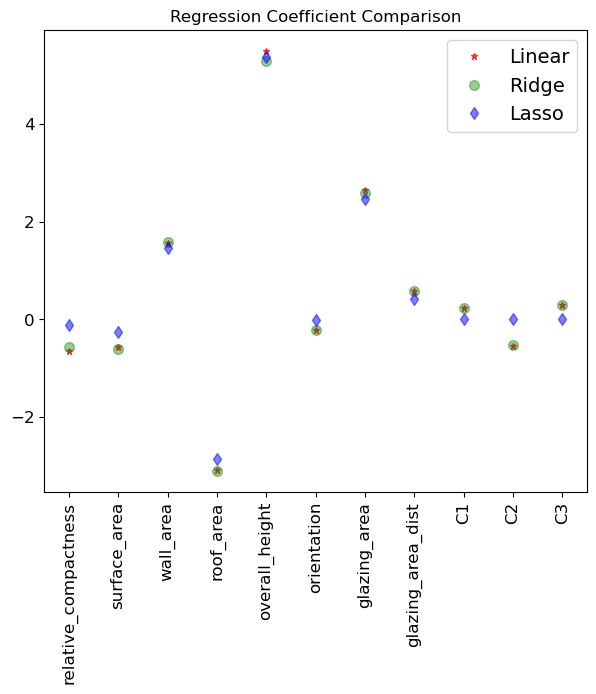

In [87]:
# Can use to plot reg coefficients and comapre.

features = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height', 'orientation', 
            'glazing_area', 'glazing_area_dist', 'C1', 'C2', 'C3']
plt.figure(figsize = (7, 6))
# linear_reg plot
plt.plot(features, lin_reg.coef_, alpha=0.7, linestyle='none', marker='*', markersize=5, color='red')
# ridge_reg plot
plt.plot(features,ridge_reg.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green')
# lasso_reg plot
plt.plot(lasso_reg.coef_,alpha=0.5, linestyle='none', marker='d', markersize=6, color='blue')
plt.title("Regression Coefficient Comparison")
legend_drawn_flag = True
plt.legend(["Linear","Ridge","Lasso"], loc=0, frameon=legend_drawn_flag, fontsize=14)
plt.xticks(rotation = 90)
plt.show()

We plotted the calculated coefficients for all three models against each other in each data category in the graph above.

I could have done elastic net but it didn't really seem worth it since for one, it is more general in its predictions than either of the two, and secondly becasue ot is a combination of lasso and ridge regressoin, whihc means depending on the regularisation you apply to yhe model, you can basically also just end up with it applying simple ridge and linear regresion to our data rather than a combination of the two.

In [88]:
# Regularisation hyperparameter for Lasso,
# alpha - the strength of regularisation.

from sklearn.linear_model import Lasso

lasso_reg_hireg = Lasso(alpha=0.8)
lasso_reg_hireg.fit(energy_prepared, energy_labels)

Lasso(alpha=0.8)

In [89]:
energy_predictions = lasso_reg_hireg.predict(energy_prepared)
lasso_hireg_mse = mean_squared_error(energy_labels, energy_predictions)
lasso_hireg_rmse = np.sqrt(lasso_hireg_mse)
print("Root mean square error", lasso_hireg_rmse, "\n")
lasso_hireg_r2 = r2_score(energy_labels, energy_predictions)
print("R2 score:", lasso_hireg_r2, "\n")

Root mean square error 4.714295331626387 

R2 score: 0.780778092294221 



In [90]:
print("Regression coefficients for LASSO:", lasso_reg_hireg.coef_, "\n")

Regression coefficients for LASSO: [ 0.         -0.          0.91785486 -2.64160187  5.14842368 -0.
  1.93415479  0.          0.         -0.          0.        ] 



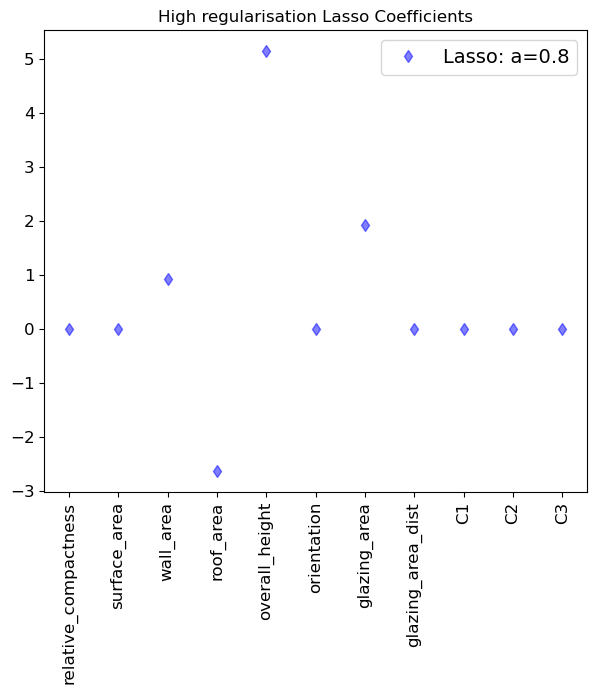

Saving figure hireg_lasso


<Figure size 640x480 with 0 Axes>

In [91]:
features = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height', 'orientation', 
            'glazing_area', 'glazing_area_dist', 'C1', 'C2', 'C3']
plt.figure(figsize = (7, 6))
# lasso_reg plot
plt.plot(features, lasso_reg_hireg.coef_,alpha=0.5, linestyle='none', marker='d', markersize=6, color='blue')
plt.title("High regularisation Lasso Coefficients")
legend_drawn_flag = True
plt.legend(["Lasso: a=0.8"], loc=0, frameon=legend_drawn_flag, fontsize=14)
plt.xticks(rotation = 90)
plt.show()
save_fig("hireg_lasso")

It appears, in lasso regression's opinion, only 'wall area', 'overall height' and 'glazing area' are useful features. And 'roof area' having an inversely proportional relationship to our target variable. 

In [92]:
# Ridge regression with high regularisation just to see what happens.
# Here solver="cholesky" chooses the one of the possible methods to compute the model,
# which is based on a closed-form solution (mathematical formula) based on the so called Cholesky method.

from sklearn.linear_model import Ridge

ridge_reg_hireg = Ridge(alpha=80, solver="cholesky", random_state=42)
ridge_reg_hireg.fit(energy_prepared, energy_labels)

Ridge(alpha=80, random_state=42, solver='cholesky')

In [93]:
energy_predictions = ridge_reg_hireg.predict(energy_prepared)
ridge_hireg_mse = mean_squared_error(energy_labels, energy_predictions)
ridge_hireg_rmse = np.sqrt(ridge_hireg_mse)

print("Root mean square error", ridge_rmse, "\n")
print("R2 score:", ridge_r2, "\n")

print("Root mean square error with high regularisation", ridge_hireg_rmse, "\n")
ridge_hireg_r2 = r2_score(energy_labels, energy_predictions)
print("R2 score with high regularisation:", ridge_hireg_r2, "\n")

Root mean square error 4.425173542959784 

R2 score: 0.8068427581190463 

Root mean square error with high regularisation 4.516432797629879 

R2 score with high regularisation: 0.7987937411230859 



Worth noting that we're only seeing a slightly higher loss and slightly lower variance for a much higher degree of regularisation.

In [94]:
print("Regression coefficients for RIDGE:", ridge_reg.coef_, "\n")
print("Regression coefficients for High regularisation RIDGE:", ridge_reg_hireg.coef_, "\n")

Regression coefficients for RIDGE: [-0.56169619 -0.60931748  1.58951061 -3.1141669   5.2978282  -0.20689966
  2.58931393  0.58699571  0.22919691 -0.52154157  0.29234466] 

Regression coefficients for High regularisation RIDGE: [-0.11212792 -0.82099534  1.64867336 -3.06644187  4.38227254 -0.19188819
  2.26624651  0.59164748  0.16270893 -0.4168052   0.25409627] 



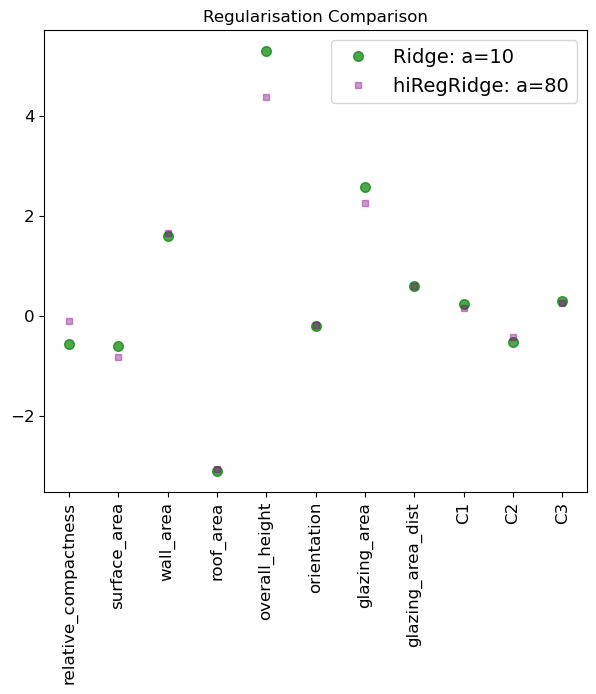

In [95]:
# Can use to plot reg coefficients and comapre.

features = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height', 'orientation', 
            'glazing_area', 'glazing_area_dist', 'C1', 'C2', 'C3']
plt.figure(figsize = (7, 6))
# ridge_reg plot
plt.plot(features,ridge_reg.coef_,alpha=0.7,linestyle='none',marker='o',markersize=7,color='green')
# ridge_reg_hireg plot
plt.plot(features, ridge_reg_hireg.coef_, alpha=0.4, linestyle='none', marker='s', markersize=5, color='purple')
plt.title("Regularisation Comparison")
legend_drawn_flag = True
plt.legend(["Ridge: a=10","hiRegRidge: a=80"], loc=0, frameon=legend_drawn_flag, fontsize=14)
plt.xticks(rotation = 90)
plt.show()

We can see in the plot above how a high degree of regularisation is affecting each attribute respectively.

Note, ridge regression and lasso regression are regularised linear regression models.

## Better Evaluation Using Cross-Validation (CV)

In [96]:
# First define a function to display (error) scores in a CV, on all test folds, and their average and standard
# deviation.

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [97]:
print("Rmse for lin reg without cv:", lin_rmse, "\n") 

Rmse for lin reg without cv: 4.422765576654176 



In [98]:
# Evaluating Linear regression within CV, it shows a rmse error only very slightly larger than on the training set
# and in some cases, even slightly lower.
# Very simple models such as linear regression models overfit much less on the data since they're not very flexible;
# still, they can overfit if they are built on data that has many variables and not enough data instances.

from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, energy_prepared, energy_labels,
                             n_jobs=-1, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [4.51003452 4.57354112 4.85121636 4.0359757  4.66768307 4.57096223
 3.96236519 4.89908728 4.86401904 4.18570979]
Mean: 4.5120594296386125
Standard deviation: 0.3248829725175943


Note, the 'Mean' and 'Standard Deviation' being displayed above isn't for the training data but for the scores of the cross validation.

In [99]:
print("Rmse for ridge reg without cv:", ridge_rmse, "\n") 

Rmse for ridge reg without cv: 4.425173542959784 



In [100]:
# Evaluating Ridge regression within CV, we see a more reasonable rmse error.

from sklearn.model_selection import cross_val_score

ridge_scores = cross_val_score(ridge_reg, energy_prepared, energy_labels,
                         n_jobs=-1, scoring="neg_mean_squared_error", cv=10)
ridge_rmse_scores = np.sqrt(-ridge_scores)
display_scores(ridge_rmse_scores)

Scores: [4.49929324 4.53597411 4.88606788 4.00365302 4.6161882  4.57682248
 3.94784146 4.93856805 4.88745424 4.20485552]
Mean: 4.509671821245701
Standard deviation: 0.3390606658585006


In [101]:
print("Rmse for lasso reg without cv:", lasso_rmse, "\n") 

Rmse for lasso reg without cv: 4.480476777919347 



In [102]:
# Evaluating Lasso regression within CV.

from sklearn.model_selection import cross_val_score

lasso_scores = cross_val_score(lasso_reg, energy_prepared, energy_labels,
                                n_jobs=-1, scoring="neg_mean_squared_error", cv=10)
lasso_rmse_scores = np.sqrt(-lasso_scores)
display_scores(lasso_rmse_scores)

Scores: [4.47790545 4.52303073 5.01243126 4.03213525 4.72823545 4.5131225
 4.01320426 4.98958192 4.82706521 4.33625325]
Mean: 4.545296529676682
Standard deviation: 0.33536440975270565


Note, I could have done cross validation directly further up rather than doing it seperately. Versions of ridge and lasso regression with CV built in exist that I could have imported instead. I chose to do it seperately as it provides a better point of refrence to see what CV can provide over just making the direct caluculation just once.

# Fine-Tuning the Model

## Grid Search

In [103]:
# Tunning a ridge regression model; this is optimising the model over a set/grid of values for the hyperparameters.
# 'alpha' is the amount of regularisation we're applying.
# 'solver' is used in the computational routines

from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'alpha': [20, 50, 90],'solver': ["cholesky","svd","sparse_cg","saga"]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'alpha': [30, 70],'solver': ["cholesky","svd","saga"]},
  ]

ridge_reg = Ridge(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(ridge_reg, param_grid, cv=5, n_jobs=-1,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(energy_prepared, energy_labels)

GridSearchCV(cv=5, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid=[{'alpha': [20, 50, 90],
                          'solver': ['cholesky', 'svd', 'sparse_cg', 'saga']},
                         {'alpha': [30, 70],
                          'solver': ['cholesky', 'svd', 'saga']}],
             return_train_score=True, scoring='neg_mean_squared_error')

The best hyperparameter combination found:

In [104]:
grid_search.best_params_

{'alpha': 20, 'solver': 'saga'}

In [105]:
grid_search.best_estimator_

Ridge(alpha=20, random_state=42, solver='saga')

Let's look at the score of each hyperparameter combination tested during the grid search:

In [106]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.502536647457457 {'alpha': 20, 'solver': 'cholesky'}
4.5025366474574575 {'alpha': 20, 'solver': 'svd'}
4.502547053681063 {'alpha': 20, 'solver': 'sparse_cg'}
4.502528519032764 {'alpha': 20, 'solver': 'saga'}
4.5444983426329815 {'alpha': 50, 'solver': 'cholesky'}
4.5444983426329815 {'alpha': 50, 'solver': 'svd'}
4.544510602085232 {'alpha': 50, 'solver': 'sparse_cg'}
4.544488894909639 {'alpha': 50, 'solver': 'saga'}
4.631792914194638 {'alpha': 90, 'solver': 'cholesky'}
4.631792914194638 {'alpha': 90, 'solver': 'svd'}
4.63181285050141 {'alpha': 90, 'solver': 'sparse_cg'}
4.6317840162212045 {'alpha': 90, 'solver': 'saga'}
4.512946194755507 {'alpha': 30, 'solver': 'cholesky'}
4.512946194755507 {'alpha': 30, 'solver': 'svd'}
4.512937422852422 {'alpha': 30, 'solver': 'saga'}
4.585301675480944 {'alpha': 70, 'solver': 'cholesky'}
4.585301675480944 {'alpha': 70, 'solver': 'svd'}
4.5852922563851175 {'alpha': 70, 'solver': 'saga'}


In [107]:
# here are the cross validation results in full as a dataframe

pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_solver,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001203,0.000308,0.000349,0.000079,20,cholesky,"{'alpha': 20, 'solver': 'cholesky'}",-20.137990,-19.410782,-21.001130,...,-20.272836,0.718540,2,-19.522915,-19.803778,-19.325806,-19.816070,-19.562523,-19.606219,0.184688
1,0.000745,0.000059,0.000214,0.000013,20,svd,"{'alpha': 20, 'solver': 'svd'}",-20.137990,-19.410782,-21.001130,...,-20.272836,0.718540,3,-19.522915,-19.803778,-19.325806,-19.816070,-19.562523,-19.606219,0.184688
2,0.001105,0.000156,0.000252,0.000040,20,sparse_cg,"{'alpha': 20, 'solver': 'sparse_cg'}",-20.137667,-19.410729,-21.001227,...,-20.272930,0.718988,4,-19.522917,-19.803780,-19.325806,-19.816075,-19.562524,-19.606220,0.184689
3,0.001500,0.000159,0.000231,0.000019,20,saga,"{'alpha': 20, 'solver': 'saga'}",-20.138134,-19.410511,-21.001132,...,-20.272763,0.718540,1,-19.522839,-19.803790,-19.325759,-19.816043,-19.562513,-19.606189,0.184705
4,0.000754,0.000247,0.000215,0.000053,50,cholesky,"{'alpha': 50, 'solver': 'cholesky'}",-19.860193,-19.976374,-20.799490,...,-20.652465,0.818089,9,-19.998380,-20.237818,-19.825578,-20.245885,-19.989782,-20.059489,0.161153
5,0.000647,0.000096,0.000181,0.000021,50,svd,"{'alpha': 50, 'solver': 'svd'}",-19.860193,-19.976374,-20.799490,...,-20.652465,0.818089,9,-19.998380,-20.237818,-19.825578,-20.245885,-19.989782,-20.059489,0.161153
6,0.000737,0.000054,0.000161,0.000008,50,sparse_cg,"{'alpha': 50, 'solver': 'sparse_cg'}",-19.860059,-19.976331,-20.799550,...,-20.652577,0.818285,11,-19.998381,-20.237818,-19.825578,-20.245889,-19.989783,-20.059490,0.161154
7,0.001269,0.000112,0.000192,0.000017,50,saga,"{'alpha': 50, 'solver': 'saga'}",-19.860230,-19.976158,-20.799429,...,-20.652379,0.818052,8,-19.998253,-20.237835,-19.825487,-20.245847,-19.989776,-20.059440,0.161185
8,0.000625,0.000138,0.000193,0.000030,90,cholesky,"{'alpha': 90, 'solver': 'cholesky'}",-19.898314,-20.911791,-21.100222,...,-21.453506,1.214243,16,-20.887644,-21.062771,-20.732513,-21.057345,-20.801725,-20.908400,0.133238
9,0.000926,0.000308,0.000228,0.000047,90,svd,"{'alpha': 90, 'solver': 'svd'}",-19.898314,-20.911791,-21.100222,...,-21.453506,1.214243,17,-20.887644,-21.062771,-20.732513,-21.057345,-20.801725,-20.908400,0.133238


### Analyzing the Best Model and Their Regression Coefficients (Ridge Regression)

In [108]:
feature_importances = grid_search.best_estimator_.coef_ 
# Its grabbing the best estimator from gridsearchCV above and picking out the useful features from the data set as
# determined by the lasso regression using their coefficients.
feature_importances

array([-0.4792918 , -0.65120231,  1.60803511, -3.1245357 ,  5.12093441,
       -0.20479084,  2.53641927,  0.59022284,  0.21717135, -0.50413578,
        0.28696443])

In [109]:
# This cell is basically just assigning each attribute its regression coefficient.
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(5.120934406219835, 'overall_height'),
 (2.536419272474006, 'glazing_area'),
 (1.6080351076071562, 'wall_area'),
 (0.5902228361931146, 'glazing_area_dist'),
 (0.2869644291521407, 'C3'),
 (0.21717135121095707, 'C1'),
 (-0.2047908402890526, 'orientation'),
 (-0.4792917959282487, 'relative_compactness'),
 (-0.5041357803631051, 'C2'),
 (-0.6512023062478588, 'surface_area'),
 (-3.1245356959504877, 'roof_area')]

### Evaluate The System on the Test Set (Ridge Regression)

In [110]:
# This should hand our final model the best combination of the hyper parameters that were determined by GridsearchCV 
# for our regression. 
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("heating_load", axis=1)
y_test = strat_test_set["heating_load"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [111]:
final_rmse # on ridge

4.637025298818324

## Grid search for lasso regression.

In [112]:
# Tunning a lasso regression model; this is optimising the model over a set/grid of values for the hyperparameters.
# 'alpha' is the amount of regularisation we're applying.
# 'max_iter' is The maximum number of iterations the regression runs over the training data.

from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'alpha': [0.2, 0.5, 0.9],'max_iter': [500,700,1000,1200]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'alpha': [0.3, 0.7],'max_iter': [200,2000,20000]},
  ]

lasso_reg = Lasso(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(lasso_reg, param_grid, cv=5, n_jobs=-1,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(energy_prepared, energy_labels)

GridSearchCV(cv=5, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid=[{'alpha': [0.2, 0.5, 0.9],
                          'max_iter': [500, 700, 1000, 1200]},
                         {'alpha': [0.3, 0.7], 'max_iter': [200, 2000, 20000]}],
             return_train_score=True, scoring='neg_mean_squared_error')

The best hyperparameter combination found:

In [113]:
grid_search.best_params_

{'alpha': 0.2, 'max_iter': 500}

In [114]:
grid_search.best_estimator_

Lasso(alpha=0.2, max_iter=500, random_state=42)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [115]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.54779760808166 {'alpha': 0.2, 'max_iter': 500}
4.54779760808166 {'alpha': 0.2, 'max_iter': 700}
4.54779760808166 {'alpha': 0.2, 'max_iter': 1000}
4.54779760808166 {'alpha': 0.2, 'max_iter': 1200}
4.641027844581229 {'alpha': 0.5, 'max_iter': 500}
4.641027844581229 {'alpha': 0.5, 'max_iter': 700}
4.641027844581229 {'alpha': 0.5, 'max_iter': 1000}
4.641027844581229 {'alpha': 0.5, 'max_iter': 1200}
4.815816749662443 {'alpha': 0.9, 'max_iter': 500}
4.815816749662443 {'alpha': 0.9, 'max_iter': 700}
4.815816749662443 {'alpha': 0.9, 'max_iter': 1000}
4.815816749662443 {'alpha': 0.9, 'max_iter': 1200}
4.574051900214751 {'alpha': 0.3, 'max_iter': 200}
4.574051900214751 {'alpha': 0.3, 'max_iter': 2000}
4.574051900214751 {'alpha': 0.3, 'max_iter': 20000}
4.723495534763501 {'alpha': 0.7, 'max_iter': 200}
4.723495534763501 {'alpha': 0.7, 'max_iter': 2000}
4.723495534763501 {'alpha': 0.7, 'max_iter': 20000}


In [116]:
# here are the cross validation results in full as a dataframe

pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001684,0.000429,0.000392,0.000119,0.2,500,"{'alpha': 0.2, 'max_iter': 500}",-20.418158,-20.279264,-21.625548,...,-20.682463,0.604338,1,-19.949474,-20.167110,-19.730929,-20.232231,-19.878874,-19.991724,0.185007
1,0.000967,0.000135,0.000219,0.000018,0.2,700,"{'alpha': 0.2, 'max_iter': 700}",-20.418158,-20.279264,-21.625548,...,-20.682463,0.604338,1,-19.949474,-20.167110,-19.730929,-20.232231,-19.878874,-19.991724,0.185007
2,0.001074,0.000374,0.000264,0.000063,0.2,1000,"{'alpha': 0.2, 'max_iter': 1000}",-20.418158,-20.279264,-21.625548,...,-20.682463,0.604338,1,-19.949474,-20.167110,-19.730929,-20.232231,-19.878874,-19.991724,0.185007
3,0.001028,0.000153,0.000226,0.000026,0.2,1200,"{'alpha': 0.2, 'max_iter': 1200}",-20.418158,-20.279264,-21.625548,...,-20.682463,0.604338,1,-19.949474,-20.167110,-19.730929,-20.232231,-19.878874,-19.991724,0.185007
4,0.001215,0.000511,0.000285,0.000098,0.5,500,"{'alpha': 0.5, 'max_iter': 500}",-20.281671,-21.661377,-21.906999,...,-21.539139,0.698020,8,-20.819081,-21.038356,-20.592995,-21.146364,-20.996144,-20.918588,0.193987
5,0.001005,0.000250,0.000272,0.000130,0.5,700,"{'alpha': 0.5, 'max_iter': 700}",-20.281671,-21.661377,-21.906999,...,-21.539139,0.698020,8,-20.819081,-21.038356,-20.592995,-21.146364,-20.996144,-20.918588,0.193987
6,0.001404,0.000553,0.000256,0.000049,0.5,1000,"{'alpha': 0.5, 'max_iter': 1000}",-20.281671,-21.661377,-21.906999,...,-21.539139,0.698020,8,-20.819081,-21.038356,-20.592995,-21.146364,-20.996144,-20.918588,0.193987
7,0.001048,0.000582,0.000188,0.000019,0.5,1200,"{'alpha': 0.5, 'max_iter': 1200}",-20.281671,-21.661377,-21.906999,...,-21.539139,0.698020,8,-20.819081,-21.038356,-20.592995,-21.146364,-20.996144,-20.918588,0.193987
8,0.000761,0.000078,0.000181,0.000017,0.9,500,"{'alpha': 0.9, 'max_iter': 500}",-20.583911,-23.716647,-22.704475,...,-23.192091,1.535016,15,-22.517137,-22.662683,-22.278061,-22.781960,-22.990521,-22.646072,0.240600
9,0.000745,0.000073,0.000180,0.000015,0.9,700,"{'alpha': 0.9, 'max_iter': 700}",-20.583911,-23.716647,-22.704475,...,-23.192091,1.535016,15,-22.517137,-22.662683,-22.278061,-22.781960,-22.990521,-22.646072,0.240600


We can see that between the two gridsearchCV's we ran for ridge and lasso regression, lasso was the better performer of the two.

Note, I would have done a grid search for linear regression too if it had enogh parameters to warrant putting it through that fine tuning. CV by itself should suffice foe linear regression.

## Analyzing the Best Model and Their Regression Coefficients (Lasso Regression)

In [117]:
feature_importances = grid_search.best_estimator_.coef_ 
# Its grabbing the best estimator from gridsearchCV above and picking out the useful features from the data set as
# determined by the lasso regression using their coefficients.
feature_importances

array([-0.11159386, -0.25539393,  1.46402372, -2.86124696,  5.38982501,
       -0.01471557,  2.47207976,  0.41649592,  0.        , -0.        ,
        0.        ])

In [118]:
# This cell is basically just assigning each attribute its regression coefficient.
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(5.389825005162748, 'overall_height'),
 (2.4720797590339934, 'glazing_area'),
 (1.464023723989539, 'wall_area'),
 (0.416495919407368, 'glazing_area_dist'),
 (0.0, 'C3'),
 (-0.0, 'C2'),
 (0.0, 'C1'),
 (-0.01471556933609707, 'orientation'),
 (-0.11159386302334898, 'relative_compactness'),
 (-0.25539392684190665, 'surface_area'),
 (-2.8612469587486133, 'roof_area')]

## Evaluate The System on the Test Set (Lasso Regression)

In [119]:
# This should hand our final model the best combination of the hyper parameters that were determined by GridsearchCV 
# for our regression. 
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("heating_load", axis=1)
y_test = strat_test_set["heating_load"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [120]:
final_rmse # on lasso

4.561842852429081

Note, I've done the grid search each of my two selected regressions and their test sets right after after having done the grid search. Basically as two pairs of search and test. First for Ridge and then for Lasso.

## Combining preparation/preprocessing and prediction in same pipeline

In [121]:
# A full pipeline with both preparation and prediction (can also do regression by simply changing the regression).

full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("lasso", Lasso())
    ])

full_pipeline_with_predictor.fit(energy, energy_labels)
full_pipeline_with_predictor.predict(some_data)

array([28.88572456, 10.87412059, 26.71039113, 15.25775832, 16.72907845])

## Model persistence using joblib

In [122]:
my_model = full_pipeline_with_predictor

In [123]:
# Saving and recovering a model.
# we can use this to share models, just change my model to the model you want to save.

import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

## Final remarks

I have done this application of predicting heat loads for building using regression algorithms. I used regression algorithims to illustrate this ML analysis of prediction. The three regression algorithims I demonstrated in this notebook are Linear regression, Ridge regression and Lasso regression. It is worth mentioning that Ridge and Lasso regression are regularised linear regression models. I have visualized the provided data and preprocessed it, transforming categories of the data when required and accounting for missing values. I fed this processed data into my three regression algorithims and picked the two I believed to perform admirably on the data. It's worth noting lasso regression performs feature selection on the data that it is fed when high regularisation is applied to the regression, which I have done. I continued to fine tune the two models I chose using CV to verify my choice and GridsearchCV to further tune. I used the built in method of GridsearchCV to find the best combination of hyper parameters for both my chosen regressions to determine the best versions of my models. I ran the test set on both these models for their final ealuation on unseen data. Both models performed as expected or within the margin I expected from looking at the grid search results.